In [1]:
import sys
sys.path.append("../../code")

In [2]:
import gen

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim

In [4]:
class FNN(nn.Module):
    def __init__(self):
        super(FNN, self).__init__()
        self.fc_layer = nn.Sequential(
            nn.Linear(28*28,1024),
            nn.ReLU(inplace=True),
            
            nn.Linear(1024, 4096),
            nn.ReLU(inplace=True),
            
            nn.Linear(4096, 1024),
            nn.ReLU(inplace=True),
            
            nn.Linear(1024, 10),
            nn.Sigmoid()
    )
    def forward(self, x):
        x = x.view(x.size(0), 28*28)
        x = self.fc_layer(x)
        return x

In [5]:
train_model = FNN()

In [6]:
#adv_train(data_set, adv_sample_path, sample_num, sample_shape, train_model, model_lossfun, model_optimizer, config, METHOD_dataset_NET_TNET)
data_set = 'mnist'
adv_sample_path = '../sample/PGD_mnist_FNN/train'
sample_num = 60000
sample_shape = [1,28,28]
model_lossfun = nn.CrossEntropyLoss()
model_optimizer = optim.SGD(train_model.parameters(), lr=0.001, momentum=0.9, weight_decay=1e-4)
config = 'PGD_mnist_FNN_FNN.json'
METHOD_dataset_NET_TNET = 'PGD_mnist_FNN_FNN'

In [7]:
gen.adv_train(
    data_set, 
    adv_sample_path, 
    sample_num, 
    sample_shape, 
    train_model, 
    model_lossfun, 
    model_optimizer, 
    config, 
    METHOD_dataset_NET_TNET)

epoch:0/100
loss:8.40667534,cost:7.2878s
epoch:1/100
loss:8.28196239,cost:7.1188s
epoch:2/100
loss:7.73394251,cost:7.1492s
epoch:3/100
loss:6.80028439,cost:7.2589s
epoch:4/100
loss:6.45555639,cost:7.1638s
epoch:5/100
loss:6.25459242,cost:7.0265s
epoch:6/100
loss:6.10243511,cost:7.2609s
epoch:7/100
loss:6.01339531,cost:7.1411s
epoch:8/100
loss:5.95617580,cost:7.2784s
epoch:9/100
loss:5.91448641,cost:7.2157s
epoch:10/100
loss:5.88075447,cost:7.1856s
epoch:11/100
loss:5.85183859,cost:7.1531s
epoch:12/100
loss:5.82803345,cost:7.4049s
epoch:13/100
loss:5.80845356,cost:7.3939s
epoch:14/100
loss:5.79195261,cost:7.3419s
epoch:15/100
loss:5.77771854,cost:7.3849s
epoch:16/100
loss:5.76520157,cost:7.3763s
epoch:17/100
loss:5.75399876,cost:7.3701s
epoch:18/100
loss:5.74384403,cost:7.4072s
epoch:19/100
loss:5.73455000,cost:7.4514s
epoch:20/100
loss:5.72597456,cost:7.6425s
epoch:21/100
loss:5.71800756,cost:7.2245s
epoch:22/100
loss:5.71054506,cost:7.3825s
epoch:23/100
loss:5.70353079,cost:7.3110s
ep

In [7]:
import val

In [8]:
adv_model = torch.load('../model/adv_train/PGD_mnist_FNN_FNN/model.pkl')

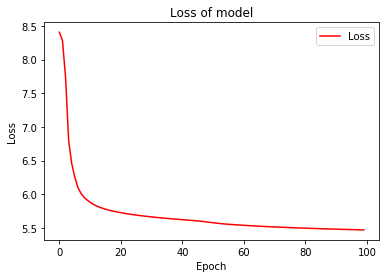

In [9]:
# make_loss_curve(loss_file, file_type)
val.make_loss_curve(
    loss_file = '../model/adv_train/PGD_mnist_FNN_FNN/loss.txt',
    file_type = 'adv_train')

In [10]:
import tst

In [11]:
tst.accuracy_test(
    model = adv_model, 
    data_set = 'mnist'
    )

accuracy:96.230000%


## FGSM

In [12]:
# robustness_test(model, adv_sample_path, sample_num, sample_shape):
tst.robustness_test(
    model = adv_model,
    adv_sample_path = '../sample/FGSM_mnist_FNN/test',
    sample_num = 10000,
    sample_shape = [1,28,28]
)

fooling_rate:29.360000%


In [13]:
# robustness_test(model, adv_sample_path, sample_num, sample_shape):
tst.robustness_test(
    model = adv_model,
    adv_sample_path = '../sample/FGSM_mnist_LeNet/test',
    sample_num = 10000,
    sample_shape = [1,28,28]
)

fooling_rate:79.500000%


In [14]:
# robustness_test(model, adv_sample_path, sample_num, sample_shape):
tst.robustness_test(
    model = adv_model,
    adv_sample_path = '../sample/FGSM_mnist_ResNet18/test',
    sample_num = 10000,
    sample_shape = [1,28,28]
)

fooling_rate:9.280000%


## JSMA

In [15]:
# robustness_test(model, adv_sample_path, sample_num, sample_shape):
tst.robustness_test(
    model = adv_model,
    adv_sample_path = '../sample/JSMA_mnist_FNN/test',
    sample_num = 10000,
    sample_shape = [1,28,28]
)

fooling_rate:33.490000%


In [16]:
# robustness_test(model, adv_sample_path, sample_num, sample_shape):
tst.robustness_test(
    model = adv_model,
    adv_sample_path = '../sample/JSMA_mnist_LeNet/test',
    sample_num = 10000,
    sample_shape = [1,28,28]
)

fooling_rate:24.690000%


In [17]:
# robustness_test(model, adv_sample_path, sample_num, sample_shape):
tst.robustness_test(
    model = adv_model,
    adv_sample_path = '../sample/JSMA_mnist_ResNet18/test',
    sample_num = 10000,
    sample_shape = [1,28,28]
)

fooling_rate:6.710000%


## DEEPFOOL

In [18]:
# robustness_test(model, adv_sample_path, sample_num, sample_shape):
tst.robustness_test(
    model = adv_model,
    adv_sample_path = '../sample/DEEPFOOL_mnist_FNN/test',
    sample_num = 10000,
    sample_shape = [1,28,28]
)

fooling_rate:43.450000%


In [19]:
# robustness_test(model, adv_sample_path, sample_num, sample_shape):
tst.robustness_test(
    model = adv_model,
    adv_sample_path = '../sample/DEEPFOOL_mnist_LeNet/test',
    sample_num = 10000,
    sample_shape = [1,28,28]
)

fooling_rate:73.180000%


In [20]:
# robustness_test(model, adv_sample_path, sample_num, sample_shape):
tst.robustness_test(
    model = adv_model,
    adv_sample_path = '../sample/DEEPFOOL_mnist_ResNet18/test',
    sample_num = 10000,
    sample_shape = [1,28,28]
)

fooling_rate:4.640000%


## PGD

In [21]:
# robustness_test(model, adv_sample_path, sample_num, sample_shape):
tst.robustness_test(
    model = adv_model,
    adv_sample_path = '../sample/PGD_mnist_FNN/test',
    sample_num = 10000,
    sample_shape = [1,28,28]
)

fooling_rate:59.670000%


In [22]:
# robustness_test(model, adv_sample_path, sample_num, sample_shape):
tst.robustness_test(
    model = adv_model,
    adv_sample_path = '../sample/PGD_mnist_LeNet/test',
    sample_num = 10000,
    sample_shape = [1,28,28]
)

fooling_rate:84.430000%


In [23]:
# robustness_test(model, adv_sample_path, sample_num, sample_shape):
tst.robustness_test(
    model = adv_model,
    adv_sample_path = '../sample/PGD_mnist_ResNet18/test',
    sample_num = 10000,
    sample_shape = [1,28,28]
)

fooling_rate:18.730000%


## THREAT

In [24]:
# robustness_test(model, adv_sample_path, sample_num, sample_shape):
tst.robustness_test(
    model = adv_model,
    adv_sample_path = '../sample/THREAT_mnist/test',
    sample_num = 10000,
    sample_shape = [1,28,28]
)

fooling_rate:82.330000%
